In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data/train_month_3_with_target.csv")
before_one_month = pd.read_csv("data/train_month_2.csv")
before_two_months = pd.read_csv("data/train_month_1.csv")

### Merge all months' information
`28695` of `63697` hasn't changed between previous two months and `23996` of `63697` hasn't changed at all. This refers to the `37.6%` of all data. We can eliminate those instances to determine which columns to use.

In [2]:
prev_months = pd.merge(before_one_month, before_two_months , on=list(before_two_months.columns.values), how='left', indicator='Exist')
prev_months['Exist'] = np.where(prev_months.Exist == 'both', True, False)
print(prev_months[prev_months['Exist']].shape)

(28695, 40)


In [3]:
all_months = pd.merge(data, prev_months, on=list(before_two_months.columns.values), how='left', indicator='exist_all')
all_months['exist_all'] = np.where(all_months.exist_all == 'both', True, False)
print(all_months[all_months['exist_all'] & all_months['Exist']].shape)

(23996, 42)


Get all changed instances (at some point)

In [4]:
filtered_data = all_months[(all_months['exist_all'] == False)|(all_months['Exist'] == False)]

In [5]:
filtered_data.drop(["Exist", "exist_all"], axis=1)

,client_id,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,...,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,1994-08,1,1943-09,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,2017-01,1,1994-02,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,1980-12,2,1936-10,2660,9.0,0,NaN,NaN,single,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,2012-11,2,1996-04,8550,9.0,0,NaN,mature,couple,1
5,f7bae3a0fefd323ecf7d4a2fab4e7826,1,1,0,0,0,0,0,0,0,...,2015-08,2,1963-11,1430,NaN,0,NaN,no,couple,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63692,0a58f2eb841ddac0626dacac6ca69524,1,1,1,0,0,0,0,0,0,...,1998-06,2,1982-02,8000,9.0,0,NaN,no,couple,0
63693,193be2222be99bf04f42193b5cdfb95d,0,0,1,0,0,0,1,0,1,...,1989-05,2,1965-05,2020,9.0,0,1.0,NaN,NaN,0
63694,fa9f074ec8cad610ccaec2270021490e,0,1,0,0,0,1,1,0,1,...,1991-01,2,1976-11,1070,9.0,0,3.0,NaN,single,0
63695,5236064e97c655b0ad99ed2155e1139e,0,0,0,0,0,0,0,0,0,...,2014-04,1,1951-03,2560,9.0,0,NaN,no,couple,0


## Importance of Each Column

In this section, we will investigate whether any columns is changing through time and whether this difference is important. Only `0.3%` of all data is churners. So if churners' percentage that had changes in a column is higher than `0.3%`, we are tend to assume that this is a behaviour that churner do.

In [6]:
count = 0
same_columns = []
changed_columns_instance_count = []
for column in list(before_two_months.columns.values):
    df = pd.merge(before_one_month, before_two_months , on=["client_id", column], how='left', indicator='Exist')
    df['Exist'] = np.where(df.Exist == 'both', True, False)
    all = pd.merge(data, df , on=["client_id", column], how='left', indicator='exist_all')
    all['exist_all'] = np.where(all.exist_all == 'both', True, False)
    filtered = all[all['Exist'] & all['exist_all']]
    if filtered.shape[0] == 63697:
        same_columns.append(column)
    else:
        count = count + 1
        changed_columns_instance_count.append((63697-filtered.shape[0], column))
        churners = filtered[filtered["target"]==1].shape[0]
        print(f"{63697-filtered.shape[0]} of 63697 and {1913 - churners} of 1913 churners changed column {column}. Percentage among changers:{(1913 - churners)/(63697-filtered.shape[0])}. Percentage among churners:{(1913 - churners)/1913} ")
        # print(f"count:{count}, {filtered.shape[0]} of 63697, column {column} is the same for all months")

1179 of 63697 and 44 of 1913 churners changed column homebanking_active. Percentage among changers:0.037319762510602206. Percentage among churners:0.02300052273915316 
217 of 63697 and 8 of 1913 churners changed column has_homebanking. Percentage among changers:0.03686635944700461. Percentage among churners:0.004181913225300575 
109 of 63697 and 4 of 1913 churners changed column has_insurance_21. Percentage among changers:0.03669724770642202. Percentage among churners:0.0020909566126502874 
82 of 63697 and 0 of 1913 churners changed column has_insurance_23. Percentage among changers:0.0. Percentage among churners:0.0 
7 of 63697 and 1 of 1913 churners changed column has_life_insurance_fixed_cap. Percentage among changers:0.14285714285714285. Percentage among churners:0.0005227391531625719 
219 of 63697 and 15 of 1913 churners changed column has_life_insurance_decreasing_cap. Percentage among changers:0.0684931506849315. Percentage among churners:0.007841087297438577 
386 of 63697 and 2

In [7]:
print(same_columns)
print("\n")
changed_columns_instance_count.sort(key=lambda x:x[0])
print(changed_columns_instance_count)

['client_id', 'customer_since_all', 'customer_since_bank', 'customer_gender', 'customer_birth_date', 'customer_postal_code', 'customer_occupation_code', 'customer_education']


[(5, 'has_savings_account_starter'), (7, 'has_life_insurance_fixed_cap'), (7, 'cap_life_insurance_fixed_cap'), (9, 'has_pension_saving'), (22, 'has_current_account_starter'), (28, 'has_savings_account'), (53, 'has_mortgage_loan'), (82, 'has_insurance_23'), (109, 'has_insurance_21'), (110, 'visits_distinct_so_areas'), (147, 'customer_self_employed'), (164, 'has_personal_loan'), (189, 'has_current_account'), (217, 'has_homebanking'), (219, 'has_life_insurance_decreasing_cap'), (257, 'bal_savings_account_starter'), (262, 'cap_life_insurance_decreasing_cap'), (386, 'has_fire_car_other_insurance'), (519, 'visits_distinct_so'), (641, 'bal_insurance_23'), (764, 'bal_current_account_starter'), (1179, 'homebanking_active'), (1311, 'bal_pension_saving'), (1922, 'customer_relationship'), (2739, 'bal_personal_loan'), (4060,

`['customer_since_all', 'customer_since_bank', 'customer_gender', 'customer_birth_date', 'customer_postal_code', 'customer_occupation_code', 'customer_education']` columns hasn't changed at all between all months, so we don't need to investigate them. We will do further investigation for the rest of the columns.

After this investigation here are the important columns for `churners`:
* `bal_current_account`: changed in 68% of all churners and seems to be more frequent amongst churners than non-churners(0.5%)
* `bal_savings_account`: changed in 56% of all churners and seems to be more frequent amongst churners than non-churners(0.4%)
* `bal_mortgage_loan`: changed in 25% of all churners and seems to be more frequent amongst churners than non-churners(0.7%)
* `bal_personal_loan`: changed in 11% of all churners and seems to be more frequent amongst churners than non-churners(0.8%)
* `prem_fire_car_other_insurance`: changed in 10% of all churners and seems to be more frequent amongst churners than non-churners(0.4%)

We are going to focus on these columns now.

### bal_current_account
On 25859 of all instances, this value is changed. This change and churn can be correlated as this change is observed around `68%` of all churners (1302/1913). Let's see how important this change is

In [8]:
bal_current_account_df = pd.DataFrame({"client_id":data["client_id"], "bal_current_account":data["bal_current_account"],
"changed_bal_current_account_one_month":before_one_month["bal_current_account"]
,"changed_bal_current_account_two_month":before_two_months["bal_current_account"], "target": data["target"] })

In [9]:
# # all months are different
# filtered_bal_current_account_df = bal_current_account_df[
#     (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_one_month"]) &
#     (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_two_month"]) & 
#     (bal_current_account_df["changed_bal_current_account_one_month"]!= bal_current_account_df["changed_bal_current_account_two_month"])
# ]


# at least one month is different
filtered_bal_current_account_df = bal_current_account_df[
    (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_one_month"]) |
    (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_two_month"]) | 
    (bal_current_account_df["changed_bal_current_account_one_month"]!= bal_current_account_df["changed_bal_current_account_two_month"])
]
filtered_bal_current_account_df["target"].value_counts()

0    24557
1     1302
Name: target, dtype: int64

Let's see the difference in random 20 samples

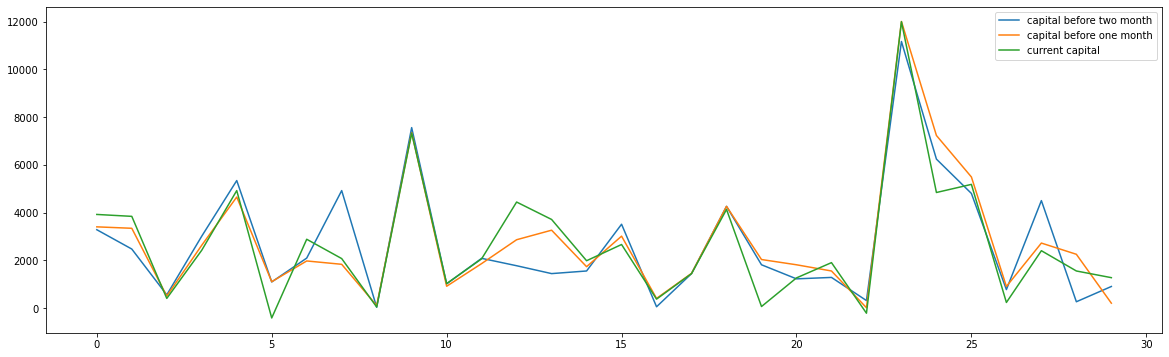

In [10]:
random = filtered_bal_current_account_df.sample(30)

plt.figure(figsize=(20,6))
# Only compare non-zero ones
x_1 = random["bal_current_account"]
x_2 = random["changed_bal_current_account_one_month"]
x_3 = random["changed_bal_current_account_two_month"]
plt.plot(list(range(len(x_3))), x_3, label = "capital before two month")
plt.plot(list(range(len(x_2))), x_2, label = "capital before one month")
plt.plot(list(range(len(x_1))), x_1, label = "current capital")
plt.legend()
plt.show()

### bal_savings_account

In [11]:
bal_savings_account_df = pd.DataFrame({"client_id":data["client_id"], "bal_savings_account":data["bal_savings_account"],
"changed_bal_savings_account_one_month":before_one_month["bal_savings_account"]
,"changed_bal_savings_account_two_month":before_two_months["bal_savings_account"], "target": data["target"] })

In [12]:
# # all months are different
# filtered_bal_current_account_df = bal_current_account_df[
#     (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_one_month"]) &
#     (bal_current_account_df["bal_current_account"]!= bal_current_account_df["changed_bal_current_account_two_month"]) & 
#     (bal_current_account_df["changed_bal_current_account_one_month"]!= bal_current_account_df["changed_bal_current_account_two_month"])
# ]


# at least one month is different
filtered_bal_savings_account_df = bal_savings_account_df[
    (bal_savings_account_df["bal_savings_account"]!= bal_savings_account_df["changed_bal_savings_account_one_month"]) |
    (bal_savings_account_df["bal_savings_account"]!= bal_savings_account_df["changed_bal_savings_account_two_month"]) | 
    (bal_savings_account_df["changed_bal_savings_account_one_month"]!= bal_savings_account_df["changed_bal_savings_account_two_month"])
]
filtered_bal_savings_account_df["target"].value_counts()

0    21746
1     1087
Name: target, dtype: int64